# Off-Facebook Analysis Report

## By Quan Vo

### 11/23/22

This assignment is split into two parts. For the first part, I will be conducting a self-analysis of my digital trace data. The caveat is that this part requires me to use Facebook data and since I don't have a Facebook account, I'll be borrowing my instructor's data for this analysis. As such, this part will be less of a "self-analysis" and more of an analysis of someone else's data. The second part of this assignment has me choose two of my favorite albums on Spotify and compare both of them by collecting data of their audio features. Both parts will have me use the data I've collected to plot different graphs and draw conclusions based on my results.

In [112]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import base64
import requests

# Part 1

To start off, I need to open one of the JSON files that contains information on the user's web and app activity, and then convert it into a data frame using pandas.

I believe Facebook collects information on what websites and apps a user visits. So if I had to guess on which apps or websites I'd see, I would expect kent.edu to be one the websites present in the data, since that would most likely be a common website for an instructor to visit. I also would expect Instagram to be in the data because both that and Facebook are owned by the same company and it's one of the most popular social media sites to have an account in.

In [113]:
with open(r"C:\Users\Quan\EMAT22110_FA22\Silva FB and IG data toshare\facebook-davidsilva100046_year-toshare\facebook-davidsilva100046_year-to_share\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as j:
    apps = json.load(j)

So the first data frame generated has two columns called "name" and "events." "name" consists of the apps or sites visited, while "events" contains three pieces of information: id, type, and timestamp. When looking at the contents of the JSON file, I notice that those three pieces are always grouped together inside curly braces, and some apps/sites contain more than one of those groupings inside "events." If I had to guess, the amount of those groups under each "events" list represents how many times an app or website has been visited.

What I need to do now is to simplify the "events" column to display the number of times each app/site was visited.

In [114]:
apps_df = pd.DataFrame(apps['off_facebook_activity_v2'])
apps_df

,name,events
0,Spotify: Spotify: Music and Podcasts,"[{'id': 174829003346, 'type': 'CUSTOM', 'times..."
1,cameo.com,"[{'id': 443618109326032, 'type': 'PAGE_VIEW', ..."
2,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ..."
3,Allstate,"[{'id': 2702763333090634, 'type': 'CUSTOM', 't..."
4,Bed Bath & Beyond,"[{'id': 346165315733088, 'type': 'PURCHASE', '..."
...,...,...
570,goodyear.com,"[{'id': 493663731138538, 'type': 'PAGE_VIEW', ..."
571,futurism.com,"[{'id': 286353685112848, 'type': 'PAGE_VIEW', ..."
572,flixlist.co,"[{'id': 687389134726121, 'type': 'PAGE_VIEW', ..."
573,freedomscientific.com,"[{'id': 2984607088284540, 'type': 'PAGE_VIEW',..."


I decided to use the len() function to see how many "events" group was inside a specific group. I chose row two of the above data frame and found that kent.edu was visited over 600 times.

In [115]:
len(apps_df['events'][2])

631

My first attempt to make a data frame with the number of site visits was to use the str.len() function. It generated a data frame with the "events" column now counting the number of visits, but it removed the "name" column, which made it harder to determine which site/app belonged in each row. I needed to find a way to put the "name" column back in the data frame.

In [116]:
events = pd.DataFrame(apps_df['events'].str.len())
events

,events
0,1
1,5
2,631
3,2
4,2
...,...
570,2
571,1
572,1
573,1


I discovered a solution where I could initialize a new variable called "counts" and have it remove the "events" column of my first data frame, then replace that column my second data frame, and renaming it "counts."

In [117]:
counts = apps_df.drop('events', axis = 1)
counts['counts'] = events['events']
counts

,name,counts
0,Spotify: Spotify: Music and Podcasts,1
1,cameo.com,5
2,kent.edu,631
3,Allstate,2
4,Bed Bath & Beyond,2
...,...,...
570,goodyear.com,2
571,futurism.com,1
572,flixlist.co,1
573,freedomscientific.com,1


Now that I got the data frame I needed, I can now create a histogram of the data I collected. The histogram itself shows one long bar and a couple bars that are very thin. Each bar represents the number of sites/apps that were visited a certain number of times. What the histogram shows is that there are over 500 websites and apps that were visited for less than 100 times, while there are very few sites that were visited for more than that. One thin bar shows that there's a website with over 600 visits, and another thin bar shows a website that's gotten over 800 visits.

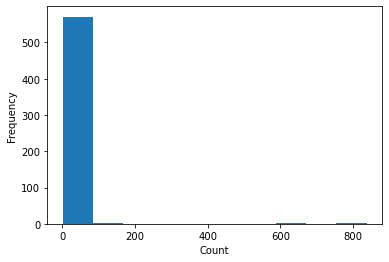

In [118]:
counts['counts'].plot.hist()
plt.xlabel('Count')
plt.show()

The final task for part 1 was to make a bar plot showing the 20 most logged apps and websites. To do this, I needed to first make a data frame where the "counts" column is ordered from greatest to smallest, then make so that the data frame would just display the first 20 rows.

In [119]:
order = counts.sort_values('counts', ascending=False)

In [120]:
counts_order = order.head(n=20)
counts_order

,name,counts
36,TikTok,838
2,kent.edu,631
230,"Hulu: Stream new TV shows, movies & series",125
45,"Hulu: Watch TV shows, movies & new original se...",118
6,sagepub.com,84
213,"Discord - Talk, Video Chat & Hang Out with Fri...",53
7,wiley.com,51
273,Hades' Star,46
232,Fitbit,40
208,U.S. Bank - Inspired by customers,39


Here are the final results for the bar plot. As you can see, TikTok and kent.edu have received a lot more visits than any other website. Almost everything else in the bar plot shows sites/apps with less than 100 visits. What I can conclude from this bar plot is that my instructor is an avid TikTok user and also frequently uses the KSU website, most likely due to his work.

What Facebook could possibly conclude is that since kent.edu has so many visits, they would conclude that the user is associated with KSU. As to how exactly the user is associated with KSU, Facebook would guess a number of things, ranging from the user being a student to an actual faculty member. Because of that, Facebook's conclusion would be accurate depending on what their guess would be.

<AxesSubplot:xlabel='name'>

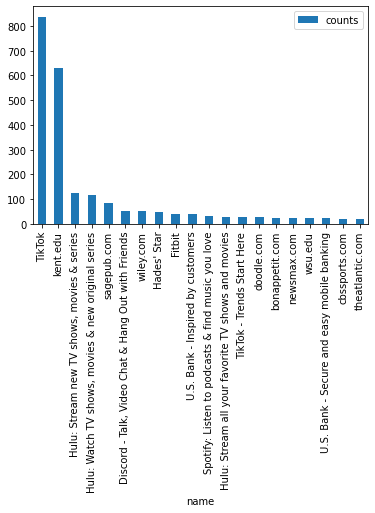

In [121]:
counts_order.plot.bar(x='name', y='counts')

# Part 2

The two albums I've chosen for part 2 are "Turn on the Bright Lights" by Interpol and "...Like Clockwork" by Queens of the Stone Age. I chose these two because they are some of my favorite albums and both have left a lasting impression on me more than most other music. Both are considered rock albums, but fall under completely different subgenres of rock music. While these two albums have different styles of rock music, they both could be compared in terms of tone and impact. I'd say both albums have a dark and moody atmosphere to them, but still have some songs that are danceable and energetic. A song being danceable could seemingly contrast to the depressing tone of a whole album, so I decided to choose valence and danceability as my audio features just to see how connected they could be for the music of both albums.

<img src="https://pbs.twimg.com/media/FanBZPVWQAET-Qi?format=jpg&name=4096x4096" width="200" align="left">
<img src="https://artesonora.pt/wp-content/uploads/2020/04/queens-of-the-stone-age-like-clockwork.jpg" width="200" align="left">

First thing I needed to do was to encode my Spotify keys and then use an access token so I would be able to collect the audio features.

In [122]:
keys = pd.read_csv("Spotify-Keys_9-23-21.txt", header = 0, sep = ",")

In [123]:
appid = keys['Client_ID'][0]

In [124]:
appsecret = keys['Client_Secret'][0]

In [125]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [126]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [127]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [128]:
response = requests.post(access_token_url, headers = header, data = payload)

In [129]:
session_token = response.json()['access_token']

In [130]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

The code cells below are the steps taken to retrieve the audio features of "Turn on the Bright Lights." This included getting the album ID off of Spotify, requesting an API endpoint, creating a dictionary, etc.

In [131]:
lights_id = '4sW8Eql2e2kdRP1A1R1clG'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(lights_id)
lights_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(lights_tracks.status_code)
lights_dict = json.loads(lights_tracks.text)
lights_track_ids = [x['id'] for x in lights_dict['items']]
lights_track_strings = ','.join(str(x) for x in lights_track_ids)
print(lights_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(lights_track_strings)

200
2ZgyzFYYOz21b2AhPPkWKF,1ZBqJilDGBVYktvlCEo9jC,4PAR0Zp6Mbu3p6NKYClgBr,286mFeYjBJ9fkioaIzaxoN,1I3XuGIh2qluBSUknDyA62,4OzNUySi012AZ05ZLo0w8F,4zYBNOB5TOf1cMpFxA5e6N,4tZdPxjFCZepceY2iuoeKp,2pIk8EErerGs25iitIvZ03,7EL7Wt6yCFfeBejZYIiTPC,0whlogyhf1AejBU72KNv38


In [132]:
lights_features = requests.get(track_features_endpoint, headers = session_header)
lights_features.status_code

200

In [133]:
lights_dict = json.loads(lights_features.text)

Once I retrieve the audio features, I then transfer all of that information into a data frame. This is the output for the first five rows.

In [134]:
lights_df = pd.DataFrame(lights_dict['audio_features'])
lights_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.174,0.794,8,-5.336,1,0.0314,0.002170,0.7330,0.0786,0.0976,91.665,audio_features,2ZgyzFYYOz21b2AhPPkWKF,spotify:track:2ZgyzFYYOz21b2AhPPkWKF,https://api.spotify.com/v1/tracks/2ZgyzFYYOz21...,https://api.spotify.com/v1/audio-analysis/2Zgy...,236707,4
1,0.377,0.938,5,-4.900,1,0.0618,0.000052,0.5800,0.0705,0.3850,120.514,audio_features,1ZBqJilDGBVYktvlCEo9jC,spotify:track:1ZBqJilDGBVYktvlCEo9jC,https://api.spotify.com/v1/tracks/1ZBqJilDGBVY...,https://api.spotify.com/v1/audio-analysis/1ZBq...,251293,4
2,0.167,0.759,5,-5.059,1,0.0333,0.013300,0.0629,0.1100,0.2840,148.646,audio_features,4PAR0Zp6Mbu3p6NKYClgBr,spotify:track:4PAR0Zp6Mbu3p6NKYClgBr,https://api.spotify.com/v1/tracks/4PAR0Zp6Mbu3...,https://api.spotify.com/v1/audio-analysis/4PAR...,259733,3
3,0.237,0.911,6,-5.833,0,0.0708,0.000021,0.8770,0.0935,0.2470,138.227,audio_features,286mFeYjBJ9fkioaIzaxoN,spotify:track:286mFeYjBJ9fkioaIzaxoN,https://api.spotify.com/v1/tracks/286mFeYjBJ9f...,https://api.spotify.com/v1/audio-analysis/286m...,299773,4
4,0.318,0.879,9,-5.651,0,0.0375,0.000035,0.9280,0.0904,0.3000,102.921,audio_features,1I3XuGIh2qluBSUknDyA62,spotify:track:1I3XuGIh2qluBSUknDyA62,https://api.spotify.com/v1/tracks/1I3XuGIh2qlu...,https://api.spotify.com/v1/audio-analysis/1I3X...,268333,4


Now I need to retrieve the audio features for "...Like Clockwork" using the same steps as the last album.

In [135]:
clock_id = '5T5NM01392dvvd4EhGrCnj'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(clock_id)
clock_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(clock_tracks.status_code)
clock_dict = json.loads(clock_tracks.text)
clock_track_ids = [x['id'] for x in clock_dict['items']]
clock_track_strings = ','.join(str(x) for x in clock_track_ids)
print(clock_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(clock_track_strings)

200
3NsalxTTrWTFPnIrUjl3Ze,1D3YGmST01Ba0WRiT7THPG,4yzozDNjvW7acuGonXwfvA,06hBdrgjUendZyH9U1WV22,0MHHAIjPAd3OSfBS3H0fPg,3i2o9tfQ09XJDbrQRN8QhK,7dRiIhfHt7ekt4tAnJl8Bi,5fb0p81SAZBkZEvmLAfGKz,0Dv8OfSPwrXmNNbE70b9Dq,3UYeU6M7cOG4g2PlAOTvz9


In [136]:
clock_features = requests.get(track_features_endpoint, headers = session_header)
clock_features.status_code

200

In [137]:
clock_dict = json.loads(clock_features.text)

Here's what the data frame looks like for the audio features of "...Like Clockwork."

In [138]:
clock_df = pd.DataFrame(clock_dict['audio_features'])
clock_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.494,0.729,7,-8.027,1,0.0446,0.105000,0.457000,0.114,0.282,105.150,audio_features,3NsalxTTrWTFPnIrUjl3Ze,spotify:track:3NsalxTTrWTFPnIrUjl3Ze,https://api.spotify.com/v1/tracks/3NsalxTTrWTF...,https://api.spotify.com/v1/audio-analysis/3Nsa...,304160,3
1,0.516,0.780,8,-4.004,0,0.0364,0.001360,0.000715,0.110,0.899,116.794,audio_features,1D3YGmST01Ba0WRiT7THPG,spotify:track:1D3YGmST01Ba0WRiT7THPG,https://api.spotify.com/v1/tracks/1D3YGmST01Ba...,https://api.spotify.com/v1/audio-analysis/1D3Y...,235587,4
2,0.551,0.386,9,-8.958,0,0.0274,0.085600,0.002260,0.133,0.379,142.047,audio_features,4yzozDNjvW7acuGonXwfvA,spotify:track:4yzozDNjvW7acuGonXwfvA,https://api.spotify.com/v1/tracks/4yzozDNjvW7a...,https://api.spotify.com/v1/audio-analysis/4yzo...,214587,4
3,0.602,0.849,11,-6.602,1,0.1000,0.636000,0.000032,0.663,0.340,112.071,audio_features,06hBdrgjUendZyH9U1WV22,spotify:track:06hBdrgjUendZyH9U1WV22,https://api.spotify.com/v1/tracks/06hBdrgjUend...,https://api.spotify.com/v1/audio-analysis/06hB...,295587,4
4,0.187,0.855,11,-4.316,0,0.0624,0.000531,0.020400,0.361,0.257,160.892,audio_features,0MHHAIjPAd3OSfBS3H0fPg,spotify:track:0MHHAIjPAd3OSfBS3H0fPg,https://api.spotify.com/v1/tracks/0MHHAIjPAd3O...,https://api.spotify.com/v1/audio-analysis/0MHH...,235400,3


Once I complete both data frames, I need to combine them in a CSV file. That way I can have a table that has the audio features for both albums.

In [139]:
lights_df['album'] = ['Bright Lights'] * len(lights_df.index)

In [140]:
clock_df['album'] = ['Clockwork'] * len(clock_df.index)

In [141]:
audio_features = pd.concat([lights_df, clock_df])

In [142]:
audio_features.to_csv('audio_features2.csv')

First five rows of the CSV.

In [143]:
af = pd.read_csv('audio_features2.csv', sep = ',')
af.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0,0.174,0.794,8,-5.336,1,0.0314,0.002170,0.7330,0.0786,0.0976,91.665,audio_features,2ZgyzFYYOz21b2AhPPkWKF,spotify:track:2ZgyzFYYOz21b2AhPPkWKF,https://api.spotify.com/v1/tracks/2ZgyzFYYOz21...,https://api.spotify.com/v1/audio-analysis/2Zgy...,236707,4,Bright Lights
1,1,0.377,0.938,5,-4.900,1,0.0618,0.000052,0.5800,0.0705,0.3850,120.514,audio_features,1ZBqJilDGBVYktvlCEo9jC,spotify:track:1ZBqJilDGBVYktvlCEo9jC,https://api.spotify.com/v1/tracks/1ZBqJilDGBVY...,https://api.spotify.com/v1/audio-analysis/1ZBq...,251293,4,Bright Lights
2,2,0.167,0.759,5,-5.059,1,0.0333,0.013300,0.0629,0.1100,0.2840,148.646,audio_features,4PAR0Zp6Mbu3p6NKYClgBr,spotify:track:4PAR0Zp6Mbu3p6NKYClgBr,https://api.spotify.com/v1/tracks/4PAR0Zp6Mbu3...,https://api.spotify.com/v1/audio-analysis/4PAR...,259733,3,Bright Lights
3,3,0.237,0.911,6,-5.833,0,0.0708,0.000021,0.8770,0.0935,0.2470,138.227,audio_features,286mFeYjBJ9fkioaIzaxoN,spotify:track:286mFeYjBJ9fkioaIzaxoN,https://api.spotify.com/v1/tracks/286mFeYjBJ9f...,https://api.spotify.com/v1/audio-analysis/286m...,299773,4,Bright Lights
4,4,0.318,0.879,9,-5.651,0,0.0375,0.000035,0.9280,0.0904,0.3000,102.921,audio_features,1I3XuGIh2qluBSUknDyA62,spotify:track:1I3XuGIh2qluBSUknDyA62,https://api.spotify.com/v1/tracks/1I3XuGIh2qlu...,https://api.spotify.com/v1/audio-analysis/1I3X...,268333,4,Bright Lights


Now I need to plot a few graphs in order to compare the danceability and valence of both albums. The first plots I made are two histograms, one comparing the danceability of both albums, and the other comparing the valence of both albums. What I found was that there are tracks on Like Clockwork that have a higher danceability than the tracks on TOTBL, while the majority of tracks on both albums combined have a relatively low valence. Since the danceability on both albums never go past 0.6, this could mean that both albums are perceived as only partially danceable. What's interesting is that there's one song on Like Clockwork that has a very high valence, but the rest of the album has a much lower valence in comparison. This means that there's one song off the album that evokes a very positive emotion. What exactly that emotion is up for interpretation but that song stands out among the rest of the album in terms of valence.

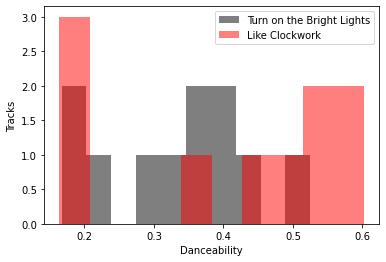

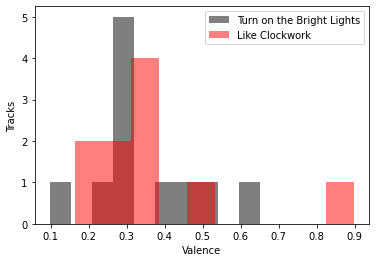

In [144]:
fig1, ax1 = plt.subplots()
tc = af[af['album'] == 'Bright Lights']['danceability']
htg = af[af['album'] == 'Clockwork']['danceability']
ax1.hist(tc, alpha = 0.5, color = 'black', label = 'Turn on the Bright Lights')
ax1.hist(htg, alpha = 0.5, color = 'red', label = 'Like Clockwork')
plt.xlabel('Danceability')
plt.ylabel('Tracks')
ax1.legend()
plt.show()

fig1, ax1 = plt.subplots()
tc = af[af['album'] == 'Bright Lights']['valence']
htg = af[af['album'] == 'Clockwork']['valence']
ax1.hist(tc, alpha = 0.5, color = 'black', label = 'Turn on the Bright Lights')
ax1.hist(htg, alpha = 0.5, color = 'red', label = 'Like Clockwork')
plt.xlabel('Valence')
plt.ylabel('Tracks')
ax1.legend()
plt.show()

The next thing I made were two scatter plots, one showing the relationship between danceability and valence for TOTBL, and the other showing the same thing but for Like Clockwork.

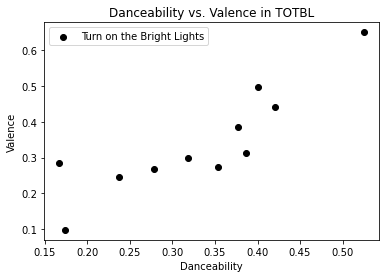

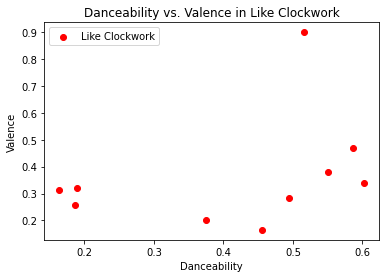

In [145]:
fig1, ax1 = plt.subplots()
lights_df = af[af['album'] == 'Bright Lights']
ax1.scatter(lights_df['danceability'], lights_df['valence'], label = 'Turn on the Bright Lights', color = 'black')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Valence')
ax1.set_title('Danceability vs. Valence in TOTBL')
ax1.legend()
plt.show()

fig1, ax1 = plt.subplots()
clock_df = af[af['album'] == 'Clockwork']
ax1.scatter(clock_df['danceability'], clock_df['valence'], label = 'Like Clockwork', color = 'red')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Valence')
ax1.set_title('Danceability vs. Valence in Like Clockwork')
ax1.legend()
plt.show()

I then combined the two scatter plots into one figure in order to compare both sets of data. It looks like TOTBL has a more consistent relationship between the two audio features due to the points rising in a more diagonal direction. In comparison, Like Clockwork seems to fluctuate more often in terms of the danceability and valence. For example, I see none of the songs in Like Clockwork land between 0.2 and 0.4 on the x-axis. This could mean that there's a large jump in danceability when listening to the album.

If there's one thing about the figure that I could improve to better show the differences, then I guess it would be nice to find a way to show which songs belong to which point. Going by the scatter plot, I'm not sure if the points are placed in the same order as the track listings. If the order is different, then showing which point represents which song could help determine when the albums start to become danceable and when they start to have a high valence. I'd be really curious to see which song on Like Clockwork has a valence of 0.9, because that is much higher than the rest of the songs.

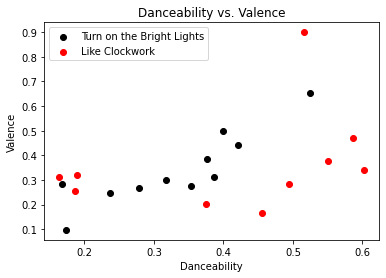

In [146]:
fig1, ax1 = plt.subplots()
lights_df = af[af['album'] == 'Bright Lights']
clock_df = af[af['album'] == 'Clockwork']
ax1.scatter(lights_df['danceability'], lights_df['valence'], label = 'Turn on the Bright Lights', color = 'black')
ax1.scatter(clock_df['danceability'], clock_df['valence'], label = 'Like Clockwork', color = 'red')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Valence')
ax1.set_title('Danceability vs. Valence')
ax1.legend()
plt.show()

The last figure I made is a box plot comparing the valence of both albums. I had to really stretch the height of the scatter plot to make the points easier to see. That one song in Like Clockwork is still the biggest outlier, landing at 0.9 while the rest of the songs on the album is below 0.5 and lands on the actual box and whisker plot. Outside of that outlier, it looks like the box plot for Like Clockwork is more condensed compared to the box plot for TOTBL, which is slightly more spread out. The only thing that confuses me are the white dots that are right next to both outliers. I'm not sure what those mean and I'm not sure if their supposed to be part of the figure.

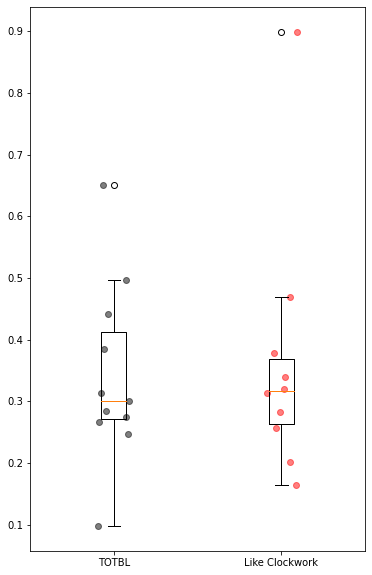

In [147]:
fig2, ax2 = plt.subplots()
lights_val = af[af['album'] == 'Bright Lights']['valence']
clock_val = af[af['album'] == 'Clockwork']['valence']
lights_x = [1] * len(lights_val)
clock_x = [2] * len(clock_val)
lights_x_jitter = np.random.uniform(-0.10, 0.10, len(lights_x))
clock_x_jitter = np.random.uniform(-0.10, 0.10, len(clock_x))
ax2.scatter(lights_x + lights_x_jitter, lights_val, alpha = 0.5, color = 'black')
ax2.scatter(clock_x + clock_x_jitter, clock_val, alpha = 0.5, color = 'red')
ax2.set_xlim(0.5, 2.5)
fig2.set_figheight(10)
ax2.boxplot([lights_val, clock_val])
ax2.set_xticks([1, 2], ['TOTBL', 'Like Clockwork'])
plt.show()

The final step for part 2 is for me to use the ttest_ind() function to test the statistical differences between the valence of both albums. What I got was the statistic score to be -0.27 and the p-value to be 0.79. Since the p-value is a lot higher than 0.05, this tells me that the results are not statistically significant, meaning that there isn't a big difference between the valence of both albums.

In [148]:
stats.ttest_ind(lights_val, clock_val)

Ttest_indResult(statistic=-0.2698153365106628, pvalue=0.7902110259076978)